<h1 style="text-align: center;font-size: 36px;color:darkblue;">Analysis</h1>

# Imports

In [2]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as pyplot
import re

# Configurations

In [3]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

In [4]:
def getPaymentMethod(inputString):
    if len(re.findall("^\d{6}",inputString.strip()))>0:
        return "Cheque"
    elif len(re.findall("UPI",inputString.strip()))>0:
        return "UPI"
    elif len(re.findall("^NEFT",inputString.strip()))>0:
        return "NEFT"
    elif len(re.findall("^IMPS",inputString.strip()))>0:
        return "IMPS"
    elif len(re.findall("^ID|^nfs/|^cashnet/",inputString.strip()))>0:
        return "ATM"
    elif len(re.findall("^SMS|^ANNUAL|Keeping|RENEWAL",inputString.strip()))>0:
        return "SMS Charge"
    elif len(re.findall("^ANNUAL",inputString.strip()))>0:
        return "Some ANNUAL Charge"
    elif len(re.findall("^ACH",inputString.strip()))>0:
        return "Automated Clearing House Payment"
    elif len(re.findall("POS/",inputString.strip()))>0:
        return "Payment done at retail store"
    elif len(re.findall("[\.\/+\:\-\_]",inputString.strip()))==0:
        return "Unknown Type Payment"
    else:
        return "Other"

In [5]:
def getRecipientName(inputString):
    if len(re.findall("^\d{6}",inputString.strip()))>0:
        return inputString.strip()[7:].strip()
    elif len(re.findall("UPI",inputString.strip()))>0:
        return re.split("[/@]",inputString.strip())[-1].strip()
    elif len(re.findall("^NEFT",inputString.strip()))>0:
        return inputString.strip().split("-")[-1].strip()
    elif len(re.findall("^ACH",inputString.strip()))>0:
        return inputString.split('-')[1].strip()
    elif len(re.findall("^IMPS",inputString.strip()))>0:
        return inputString.strip().split("/")[2].strip()
    elif len(re.findall("^SMS|^ANNUAL|Keeping|RENEWAL",inputString.strip()))>0:
        return "IDBI Bank"
    elif len(re.findall("^ID|^nfs/|^cashnet/",inputString.strip()))>0:
        return "Self"
    elif len(re.findall("POS/",inputString.strip()))>0:
        return inputString.strip().split("POS/")[-1].strip()
    elif len(re.findall("[\.\/+\:\-\_]",inputString.strip()))==0:
        return inputString.strip()
    else:
        return "Other"

In [6]:
Statement = pandas.read_csv("../../Data/Preprocessed_Data/Statement_Data.csv",parse_dates=True)

In [7]:
Statement=Statement.rename(columns={"Unnamed: 0":"index"})

# Exploratory Data Analysis

In [8]:
Statement

,Date,Description,Amount,Type
0,2023-01-31,123058-YES-SKIN CONSTRA,5900.0,Cr
1,2023-01-27,ID072502/27-01-23 19:22:30 /000000784573,700.0,Dr
2,2023-01-27,000605-ICI-NEAUM,22420.0,Cr
3,2023-01-21,NEFT-CITIN23308404597-AGARWAL,6490.0,Cr
4,2023-01-19,003747-CIT-AND ON,8496.0,Cr
...,...,...,...,...
610,2021-03-26,UPI/108501048027/3865000100077773@punb0386500,25000.0,Dr
611,2021-03-25,NEFT-BKIDN21084265353-ARFISON,3894.0,Cr
612,2021-03-25,NEFT-000331576903-VEDANT DYEST,26432.0,Cr
613,2021-03-25,CA Keeping Chgs,649.0,Dr


In [9]:
Statement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         615 non-null    object 
 1   Description  615 non-null    object 
 2   Amount       615 non-null    float64
 3   Type         615 non-null    object 
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [10]:
Statement.describe()

,Amount
count,615.000000
mean,13416.659496
std,14800.130172
min,1.000000
25%,3369.500000
50%,8500.000000
75%,18496.000000
max,100000.000000


In [11]:
Statement

,Date,Description,Amount,Type
0,2023-01-31,123058-YES-SKIN CONSTRA,5900.0,Cr
1,2023-01-27,ID072502/27-01-23 19:22:30 /000000784573,700.0,Dr
2,2023-01-27,000605-ICI-NEAUM,22420.0,Cr
3,2023-01-21,NEFT-CITIN23308404597-AGARWAL,6490.0,Cr
4,2023-01-19,003747-CIT-AND ON,8496.0,Cr
...,...,...,...,...
610,2021-03-26,UPI/108501048027/3865000100077773@punb0386500,25000.0,Dr
611,2021-03-25,NEFT-BKIDN21084265353-ARFISON,3894.0,Cr
612,2021-03-25,NEFT-000331576903-VEDANT DYEST,26432.0,Cr
613,2021-03-25,CA Keeping Chgs,649.0,Dr


In [12]:
Statement['Amount']

0       5900.0
1        700.0
2      22420.0
3       6490.0
4       8496.0
        ...   
610    25000.0
611     3894.0
612    26432.0
613      649.0
614    13539.0
Name: Amount, Length: 615, dtype: float64

In [13]:
Statement=Statement.sort_index(ascending=False)
Cumulative_Balance=0
Cumulative_Balances=[]
types=list(Statement['Type'])
Amounts=list(Statement['Amount'])
for index in range(len(Amounts)):
    if types[index].strip()=="Dr":
        Cumulative_Balance-=Amounts[index]
    elif types[index].strip()=="Cr":
        Cumulative_Balance+=Amounts[index]
    Cumulative_Balances.append(Cumulative_Balance)
Statement['Cumulative_Balance']=Cumulative_Balances

In [14]:
Statement

,Date,Description,Amount,Type,Cumulative_Balance
614,2021-03-24,592976/ LIFE INSURANCE CORPO,13539.0,Dr,-13539.00
613,2021-03-25,CA Keeping Chgs,649.0,Dr,-14188.00
612,2021-03-25,NEFT-000331576903-VEDANT DYEST,26432.0,Cr,12244.00
611,2021-03-25,NEFT-BKIDN21084265353-ARFISON,3894.0,Cr,16138.00
610,2021-03-26,UPI/108501048027/3865000100077773@punb0386500,25000.0,Dr,-8862.00
...,...,...,...,...,...
4,2023-01-19,003747-CIT-AND ON,8496.0,Cr,-55455.79
3,2023-01-21,NEFT-CITIN23308404597-AGARWAL,6490.0,Cr,-48965.79
2,2023-01-27,000605-ICI-NEAUM,22420.0,Cr,-26545.79
1,2023-01-27,ID072502/27-01-23 19:22:30 /000000784573,700.0,Dr,-27245.79


In [15]:
Statement.sort_values(by="Date",ascending=True)

,Date,Description,Amount,Type,Cumulative_Balance
614,2021-03-24,592976/ LIFE INSURANCE CORPO,13539.0,Dr,-13539.00
613,2021-03-25,CA Keeping Chgs,649.0,Dr,-14188.00
612,2021-03-25,NEFT-000331576903-VEDANT DYEST,26432.0,Cr,12244.00
611,2021-03-25,NEFT-BKIDN21084265353-ARFISON,3894.0,Cr,16138.00
610,2021-03-26,UPI/108501048027/3865000100077773@punb0386500,25000.0,Dr,-8862.00
...,...,...,...,...,...
4,2023-01-19,003747-CIT-AND ON,8496.0,Cr,-55455.79
3,2023-01-21,NEFT-CITIN23308404597-AGARWAL,6490.0,Cr,-48965.79
1,2023-01-27,ID072502/27-01-23 19:22:30 /000000784573,700.0,Dr,-27245.79
2,2023-01-27,000605-ICI-NEAUM,22420.0,Cr,-26545.79


In [16]:
Statement['Description'].value_counts()

ACH-LICHOUSINGFINLT-6121000026                       22
cashnet/+TALOJA MIDC, PENDHAR  RAIGAD       MHIN      4
KOLABA ROLLING WORKS                                  3
TRF FROM MAAS INFRA                                   2
RPAY-POS/4027 DMART KALAMBOLI   RAIGAD       MHIN     2
                                                     ..
NEFT-N302211692341325-COLOUR R                        1
NEFT-SIN20995Q0007119-M/S NOVA                        1
000966-ICI-AMAN                                       1
NEFT-N307211701032381-PRATAP R                        1
123058-YES-SKIN CONSTRA                               1
Name: Description, Length: 581, dtype: int64

In [17]:
Statement['Type'].value_counts()

Dr    309
Cr    306
Name: Type, dtype: int64

In [18]:
Statement['Payment_Mode']=Statement['Description'].apply(getPaymentMethod)

In [19]:
Statement['Recipient_Name']=Statement['Description'].apply(getRecipientName)

In [20]:
Statement

,Date,Description,Amount,Type,Cumulative_Balance,Payment_Mode,Recipient_Name
614,2021-03-24,592976/ LIFE INSURANCE CORPO,13539.0,Dr,-13539.00,Cheque,LIFE INSURANCE CORPO
613,2021-03-25,CA Keeping Chgs,649.0,Dr,-14188.00,SMS Charge,IDBI Bank
612,2021-03-25,NEFT-000331576903-VEDANT DYEST,26432.0,Cr,12244.00,NEFT,VEDANT DYEST
611,2021-03-25,NEFT-BKIDN21084265353-ARFISON,3894.0,Cr,16138.00,NEFT,ARFISON
610,2021-03-26,UPI/108501048027/3865000100077773@punb0386500,25000.0,Dr,-8862.00,UPI,punb0386500
...,...,...,...,...,...,...,...
4,2023-01-19,003747-CIT-AND ON,8496.0,Cr,-55455.79,Cheque,CIT-AND ON
3,2023-01-21,NEFT-CITIN23308404597-AGARWAL,6490.0,Cr,-48965.79,NEFT,AGARWAL
2,2023-01-27,000605-ICI-NEAUM,22420.0,Cr,-26545.79,Cheque,ICI-NEAUM
1,2023-01-27,ID072502/27-01-23 19:22:30 /000000784573,700.0,Dr,-27245.79,ATM,Self


In [21]:
Statement['Payment_Mode'].value_counts()

Cheque                              220
NEFT                                146
UPI                                 116
Automated Clearing House Payment     68
ATM                                  28
SMS Charge                           12
Payment done at retail store         10
Unknown Type Payment                  9
Other                                 3
IMPS                                  3
Name: Payment_Mode, dtype: int64

In [22]:
Statement[Statement['Payment_Mode']=="Other"]

,Date,Description,Amount,Type,Cumulative_Balance,Payment_Mode,Recipient_Name
338,2022-01-27,REJECT:18:FUNDS INSUFFICIENT,82600.0,Dr,-68905.58,Other,Other
335,2022-01-28,OW_REJ_INST_18_REJECTED_27-01-2022,177.0,Dr,-94082.58,Other,Other
30,2023-01-02,INET/0047102000012643To650102000001960/,1711.0,Cr,-46663.39,Other,Other


<AxesSubplot: ylabel='Payment_Mode'>

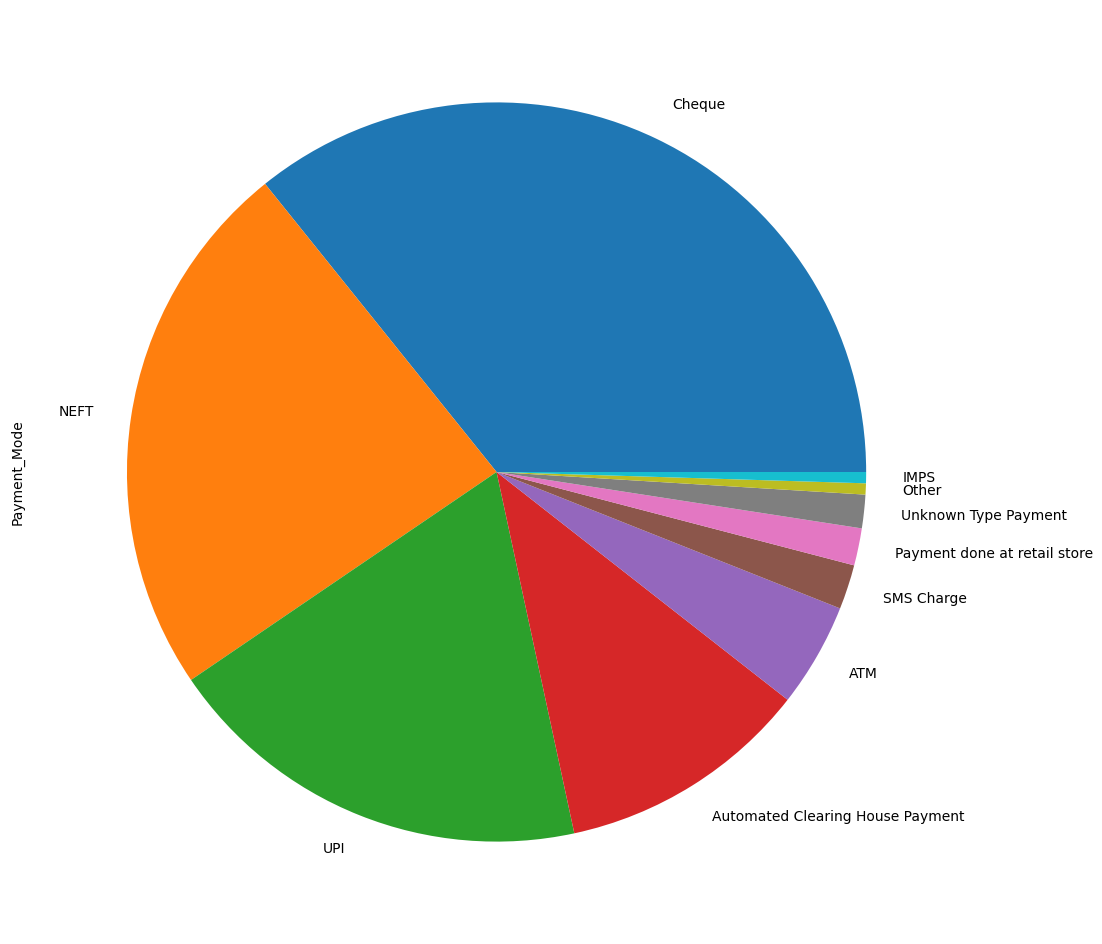

In [28]:
Statement['Payment_Mode'].value_counts().head(20).plot.pie()

In [24]:
Statement[Statement['Recipient_Name']=="Other"]

,Date,Description,Amount,Type,Cumulative_Balance,Payment_Mode,Recipient_Name
338,2022-01-27,REJECT:18:FUNDS INSUFFICIENT,82600.0,Dr,-68905.58,Other,Other
335,2022-01-28,OW_REJ_INST_18_REJECTED_27-01-2022,177.0,Dr,-94082.58,Other,Other
30,2023-01-02,INET/0047102000012643To650102000001960/,1711.0,Cr,-46663.39,Other,Other


<AxesSubplot: >

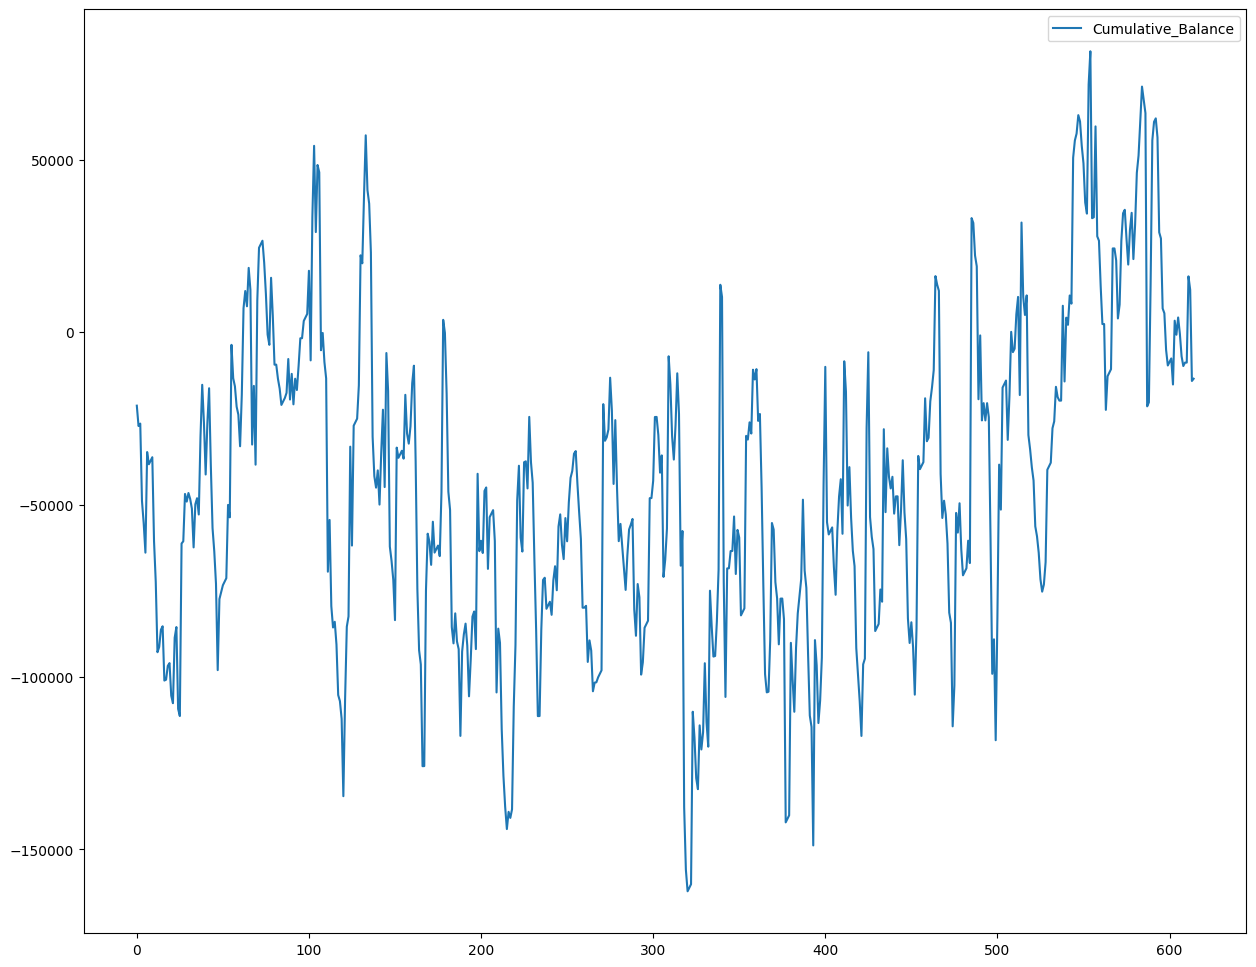

In [69]:
Statement.plot(y="Cumulative_Balance")